# 住宅情報の分析

#### 【問題1】データセットの取得

In [1]:
###################
#インポート
###################

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np


#pd.set_option('display.max_rows', None) #データフレームを隠さず表示

pd.set_option('display.max_rows', 10) #カラムの最大表示数を10に変更

pd.set_option("display.max_columns", None) #データフレームのカラムを隠さず全て表示


df = pd.read_csv("train.csv") #CSVをインポート
display(df) #インポートしたデータを出力



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

#### 【問題2】データセット自体の調査

アイオア州の住宅価格と、エリアや築年数等条件に関するデータ。過去の販売価格をもとに価格を予想する。
価格を決定する条件は、下記要素となっている。

SalePrice-プロパティのドルでの販売価格。これは、予測しようとしているターゲット変数です。

MSSubClass：建物クラス

MSZoning：一般的なゾーニング分類

LotFrontage：プロパティに接続された通りの直線フィート

LotArea：平方フィート単位のロットサイズ

Alley：道路アクセスのタイプ

Street：路地へのアクセスの種類

LotShape：プロパティの一般的な形状

LandContour：プロパティの平坦度

Utilities：利用可能なユーティリティの種類

LotConfig：ロット構成

LandSlope：プロパティの勾配

Neighborhood：エイムズ市域内の物理的な場所

Condition1：幹線道路または鉄道への近さ

Condition2：幹線道路または鉄道への近接性（秒が存在する場合）

BldgType：住居のタイプ

HouseStyle：住居のスタイル

OverallQual：総合素材と仕上がりの品質

OverallCond：総合状態評価

YearBuilt：元の建設日

YearRemodAdd：改造日

RoofStyle：屋根のタイプ

RoofMatl：屋根材

Exterior1st：家の外装カバー

Exterior2nd：家の外装カバー（複数の素材の場合）

MasVnrType：組積造ベニアタイプ

MasVnrArea：平方フィートの組積造ベニア面積

ExterQual：外装素材の品質

ExterCond：外装の素材の現状

Foundation：基礎の種類

BsmtQual：地下室の高さ

BsmtCond：地下室の一般的な状態

BsmtExposure：ストライキまたはガーデンレベルの地下壁

BsmtFinType1：地下室の仕上げエリアの品質

BsmtFinSF1：タイプ1の完成した平方フィート

BsmtFinType2：2番目に完成した領域の品質（存在する場合）

BsmtFinSF2：タイプ2の完成した平方フィート

BsmtUnfSF：地下室の未完成の平方フィート

TotalBsmtSF：地下室の総平方フィート

Heating：暖房の種類

HeatingQC：加熱の品質と状態

CentralAir：セントラルエアコン

Electrical：電気システム

1stFlrSF：1階平方フィート

2ndFlrSF：2階の平方フィート

LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）

GrLivArea：地上（地上）のリビングエリアの平方フィート

BsmtFullBath：地下のフルバスルーム

BsmtHalfBath：地下のハーフバスルーム

FullBath：グレード以上のフルバスルーム

HalfBath：グレード以上のハーフバス

BedroomAbvGr：地下階より上のベッドルームの数

KitchenAbvGr：キッチンの数

KitchenQual：キッチンの品質

TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）

Functional：ホーム機能評価

Fireplaces：暖炉の数

FireplaceQu：暖炉の品質

GarageType：ガレージの場所

GarageYrBlt：ガレージが建てられた年

GarageFinish：ガレージの内装仕上げ

GarageCars：車の容量でのガレージのサイズ

GarageArea：ガレージのサイズ（平方フィート）

GarageQual：ガレージ品質

GarageCond：ガレージの状態

PavedDrive：舗装された私道

WoodDeckSF：平方フィートのウッドデッキエリア

OpenPorchSF：平方フィート単位のオープンポーチエリア

EnclosedPorch：囲まれたポーチ領域（平方フィート）

3SsnPorch：平方フィートの3シーズンポーチエリア

ScreenPorch：平方フィート単位のスクリーンポーチ領域

PoolArea：平方フィート単位のプール面積

PoolQC：プールの品質　柵：柵の品質

MiscFeature：他のカテゴリでカバーされていないその他の機能

MiscVal：その他の機能の$ Value

MoSold：販売月

YrSold：販売年

SaleType：販売の種類

SaleCondition：販売条件



#### 【問題3】データの確認

In [2]:
print("・各特徴量がどういったものかを見る。（数値データか文字データなど)")
print("\n")
print("住宅を評価する様々な指標が特徴量となっている。築年数や物件のの広さなど一般的な物から、日本ではあまり見ないプールの品質や地下室の広さなどもある。住宅を評価する様々な指標が特徴量となっている。築年数や物件のの広さなど一般的な物から、日本ではあまり見ないプールの品質や地下室の広さなどもある。数値データや文字データなど色々混ざっている")
print("\n")


print("・今回の目的変数はどの列か確認する。")
print(df.columns.get_loc("SalePrice"))
#df.columns.get_loc('SalePrice')

print("\n")
print("・特徴量の平均値と標準偏差、四分位数を一度に表示させる。")
print(df.describe())
#df.info()


・各特徴量がどういったものかを見る。（数値データか文字データなど)


住宅を評価する様々な指標が特徴量となっている。築年数や物件のの広さなど一般的な物から、日本ではあまり見ないプールの品質や地下室の広さなどもある。住宅を評価する様々な指標が特徴量となっている。築年数や物件のの広さなど一般的な物から、日本ではあまり見ないプールの品質や地下室の広さなどもある。数値データや文字データなど色々混ざっている


・今回の目的変数はどの列か確認する。
80


・特徴量の平均値と標準偏差、四分位数を一度に表示させる。
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea

#### 【問題4】欠損値への対応

・各特徴量の欠損値の有無を確認する。


棒グラフの右の数字がデータ数で1460に達していないのは欠損値のある特徴量


<AxesSubplot:>

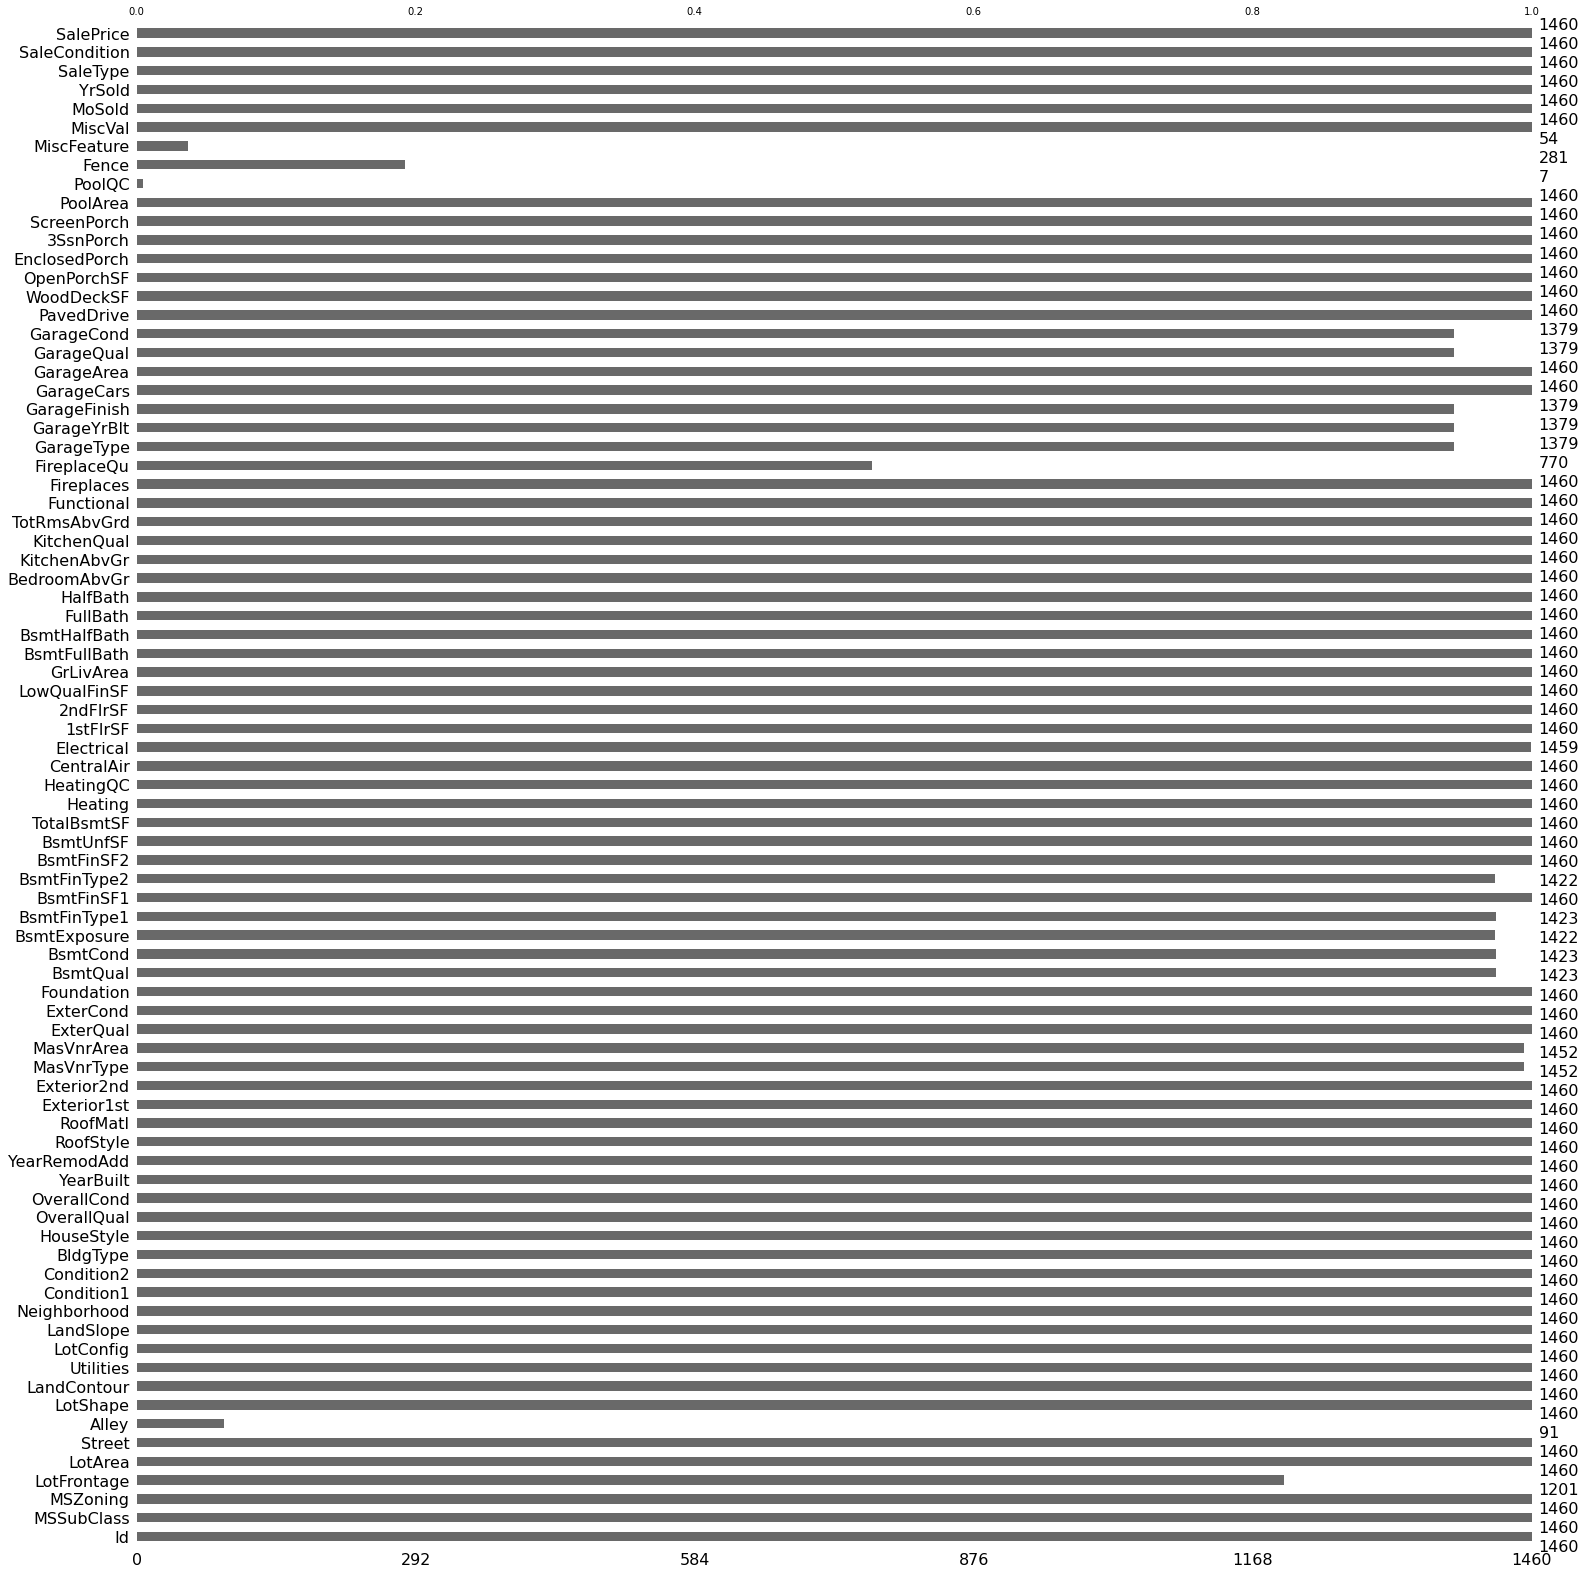

In [3]:
print("・各特徴量の欠損値の有無を確認する。")
print("\n")
print("棒グラフの右の数字がデータ数で1460に達していないのは欠損値のある特徴量")

df_missing = df.isnull() #df_missingを欠損値をTrueとするDFとする。
#print(df_missing) #欠損値の有り無しをDFで出力。 True：欠損値有り　False：欠損値無し

msno.bar(df.sample(1460)) #棒グラフで欠損値の数を表示


In [4]:
print("・欠損値が何パーセント含まれるかを確認する。")


def find_missing(data):
    """
    欠損値を見つける関数
    """
        
    count_missing = df.isnull().sum().values #count_missingは欠損値の合計を合計を求める。.values()はnumpy配列にする

    total = df.shape[0] #totalはで全体の要素数　1460
    
    ratio_missing = count_missing / total #ratio_missingは欠損値の割合

    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, 
    index=data.columns.values)# data以降はカラムのラベル名を決めている　indexはdata（find_missing関数の引数）のカラムを表示させている

find_missing(df) #【欠損値を見つける関数】の呼び出し

display(find_missing(df)) #【欠損値を見つける関数】の表示


del_missing_columns = df.dropna(thresh=1455, axis = 1) #1455以上データがあるカラムは残してそれ以外はaxis=1の列を削除する

del_missing_columns_deleteindex = del_missing_columns.dropna(how = "any" ) #インデックスに一つでも欠損値があれば削除する。dropnaはデフォルトがaxis=0
#display(del_missing_columns[MiscFeature]) #del_missing_columnsのMiscFeatureカラムを表示させてみる

print(del_missing_columns_deleteindex) #del_missing_columns_deleteindexは欠損値を行、列共に削除したDF

#print(del_missing_columns_deleteindex.info())



・欠損値が何パーセント含まれるかを確認する。


,missing_count,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm    

#### 【問題5】用語の調査

・尖度：分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
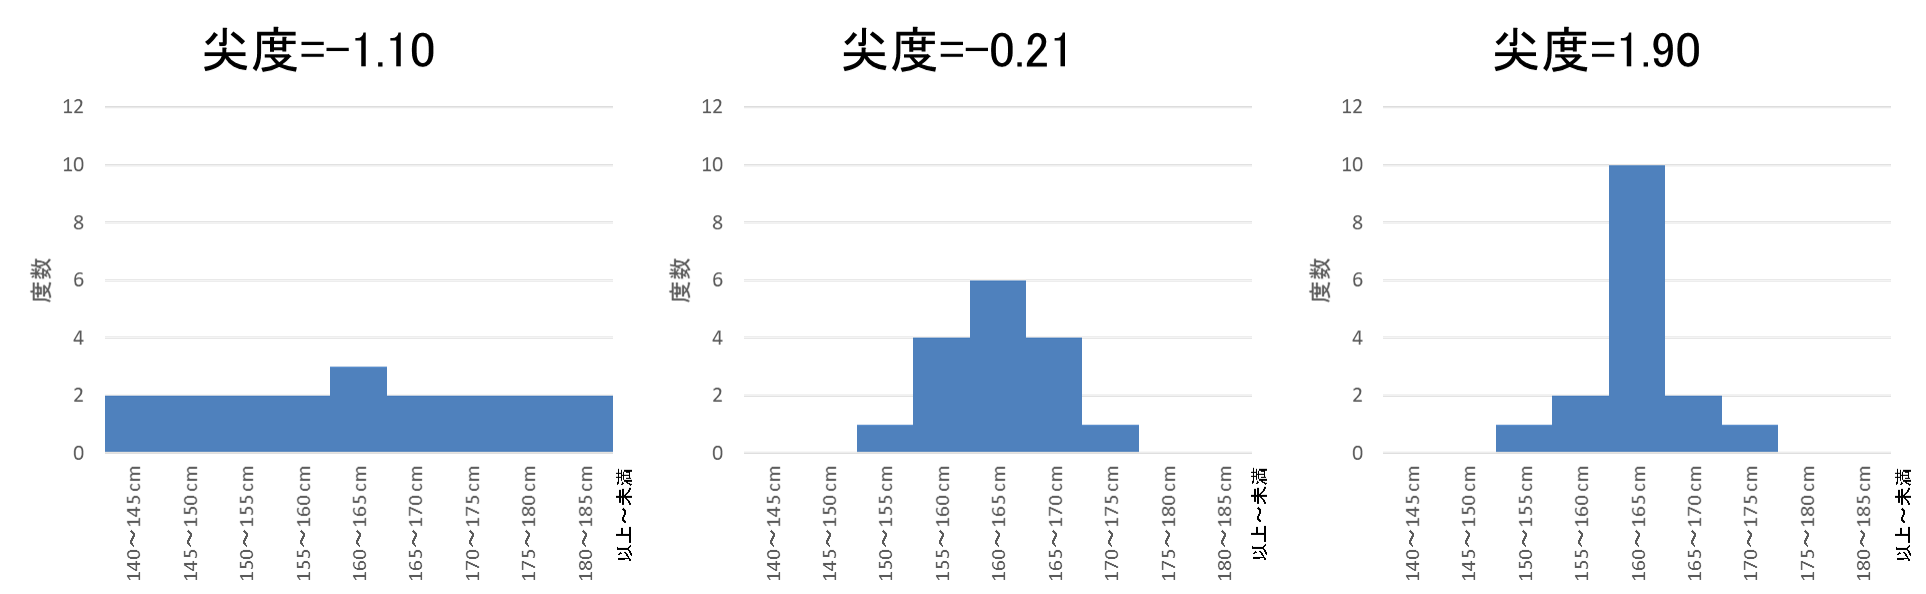

・歪度：分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。
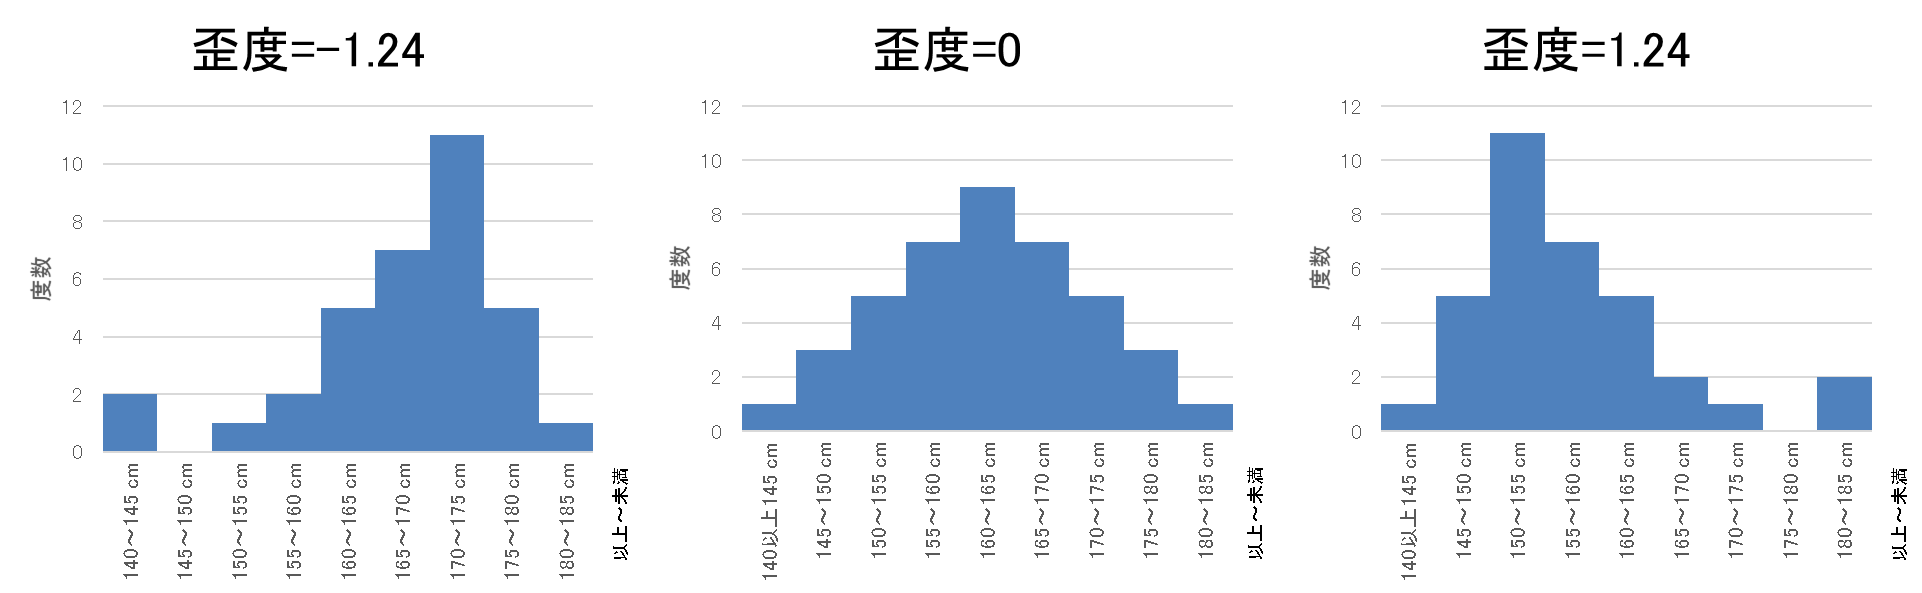

#### 【問題6】分布の確認

・seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する
Skewness : 1.8819429948035529
Kurtosis : 6.529263049673958


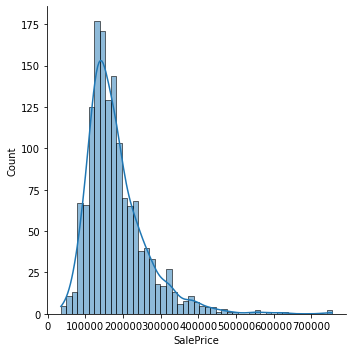

In [5]:
print("・seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する")

#sns.displot()は引数を目的変数とし、目的変数の分布図を表示する
sns.displot(del_missing_columns_deleteindex["SalePrice"],kde = True) #del_missing_columns_deleteindex["SalePrice"]が引数
#sns.histplot(del_missing_columns_deleteindex["SalePrice"],kde = True)

#print(np.array(del_missing_columns_deleteindex["SalePrice"])) #SalePriceのndarrayデータをプリント

#データフレームは
SalePrice_ndarray = np.array(del_missing_columns_deleteindex["SalePrice"]) #SalePrice_ndarrayはSalePriceの欠損値なしデータフレームのndarray


print("Skewness :", del_missing_columns_deleteindex["SalePrice"].skew())  #del_missing_columns_deleteindex["SalePrice"]　（行列共に欠損値なしSalePriceのデータフレーム）の歪度を表示させる
print("Kurtosis :", del_missing_columns_deleteindex["SalePrice"].kurt())  #del_missing_columns_deleteindex["SalePrice"]　（行列共に欠損値なしSalePriceのデータフレーム）の尖度を表示させる


In [13]:
print("・目的変数に対して対数変換を行う。")

#np.logはndarrayのデータを対数変換行うことができる関数
del_missing_columns_deleteindex_ndarray = np.log(del_missing_columns_deleteindex["SalePrice"])  #del_missing_columns_deleteindex_ndarrayはdel_missing_columns_deleteindex["SalePrice"]（欠損値なしのSalePriceのデータフレームをndarrayにしたデータ）
#print(b)
print(type(del_missing_columns_deleteindex["SalePrice"]))
pd.set_option('display.max_rows', 10) #カラムの最大表示数を10に変更
# print(math.log(100))
# print(math.log10(100))
# print(math.log2(100))

・目的変数に対して対数変換を行う。
<class 'pandas.core.series.Series'>


・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
Skewness : 0.12131775882415026
Kurtosis : 0.806927847502148


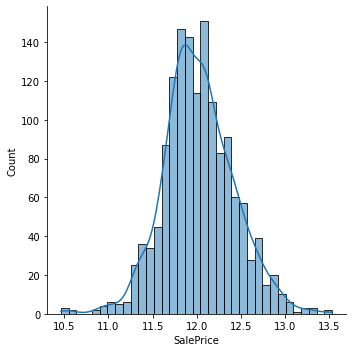

In [9]:
print("・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。")

sns.displot(del_missing_columns_deleteindex_ndarray ,kde = True) #目的変数の分布

print("Skewness :", del_missing_columns_deleteindex_ndarray.skew())
print("Kurtosis :", del_missing_columns_deleteindex_ndarray.kurt())



#### 【問題7】相関係数の確認

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。


                   Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id           1.000000    0.010589 -0.033170    -0.027553     0.013167   
MSSubClass   0.010589    1.000000 -0.139766     0.032936    -0.059134   
LotArea     -0.033170   -0.139766  1.000000     0.105786    -0.005665   
OverallQual -0.027553    0.032936  0.105786     1.000000    -0.092243   
OverallCond  0.013167   -0.059134 -0.005665    -0.092243     1.000000   
...               ...         ...       ...          ...          ...   
PoolArea     0.057163    0.008309  0.077669     0.065143    -0.002009   
MiscVal     -0.006155   -0.007651  0.038063    -0.031461     0.068752   
MoSold       0.021708   -0.013404  0.001179     0.070570    -0.003685   
YrSold       0.000566   -0.021461 -0.014254    -0.027277     0.044003   
SalePrice   -0.021756   -0.084230  0.263837     0.791069    -0.077924   

             YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id          

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021756,-0.084230,0.263837,0.791069,-0.077924,0.523273,0.507430,0.386436,-0.011412,0.214446,0.613905,0.605968,0.319464,-0.025620,0.708618,0.227082,-0.016873,0.560881,0.284400,0.168235,-0.135935,0.533779,0.466968,0.640473,0.623423,0.324422,0.315831,-0.128627,0.044571,0.111419,0.092397,-0.021200,0.046380,-0.028907,1.000000
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
GrLivArea,0.008524,0.074949,0.263109,0.593021,-0.079777,0.199286,0.287677,0.208088,-0.009686,0.240210,0.455001,0.566084,0.687726,0.134667,1.000000,0.034715,-0.018957,0.630283,0.416189,0.521310,0.100033,0.825576,0.461680,0.467321,0.468971,0.247445,0.330175,0.009057,0.020625,0.101472,0.170198,-0.002430,0.050167,-0.036505,0.708618
GarageCars,0.016254,-0.040232,0.154893,0.600991,-0.185670,0.537866,0.420573,0.224342,-0.038204,0.214284,0.435279,0.439726,0.183817,-0.094457,0.467321,0.132091,-0.020841,0.469619,0.219036,0.086075,-0.050591,0.362248,0.301095,1.000000,0.882613,0.226340,0.213763,-0.151369,0.035791,0.050554,0.020949,-0.043063,0.040631,-0.039148,0.640473
GarageArea,0.018010,-0.098558,0.180392,0.561980,-0.151662,0.479460,0.372012,0.296851,-0.018295,0.183224,0.486719,0.489741,0.138531,-0.067633,0.468971,0.179046,-0.024593,0.405944,0.163928,0.065294,-0.064486,0.337915,0.269013,0.882613,1.000000,0.224686,0.241320,-0.121871,0.035061,0.051352,0.061034,-0.027422,0.027863,-0.027347,0.623423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1stFlrSF,0.011627,-0.251484,0.299533,0.475933,-0.144646,0.283056,0.241344,0.445473,0.096948,0.317827,0.819393,1.000000,-0.202268,-0.014333,0.566084,0.244227,0.001782,0.381438,-0.119133,0.127570,0.067974,0.409901,0.410126,0.439726,0.489741,0.235582,0.211278,-0.065580,0.056042,0.088598,0.131526,-0.021167,0.031032,-0.013508,0.605968
FullBath,0.004758,0.131354,0.126100,0.551267,-0.193929,0.467960,0.438733,0.059102,-0.076306,0.289189,0.324886,0.381438,0.421170,-0.000645,0.630283,-0.064097,-0.054418,1.000000,0.135815,0.363244,0.133260,0.554759,0.244313,0.469619,0.405944,0.187719,0.260459,-0.114928,0.035424,-0.007962,0.049652,-0.014245,0.056153,-0.019748,0.560881
TotRmsAbvGrd,0.026948,0.040274,0.190037,0.427720,-0.057485,0.095401,0.191603,0.044529,-0.035170,0.250754,0.286125,0.409901,0.616400,0.131214,0.825576,-0.053122,-0.023789,0.554759,0.343353,0.676613,0.256100,1.000000,0.326419,0.362248,0.337915,0.165980,0.234382,0.004225,-0.006660,0.059441,0.083774,0.024782,0.037011,-0.034546,0.533779
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273




相関係数の高い特徴量は OverallQual. GrLivArea. GarageCars. GarageArea. TotalBsmtSF. 1stFlrSF. FullBath. TotRmsAbvGrd. YearBuilt. YearRemodAddでした。


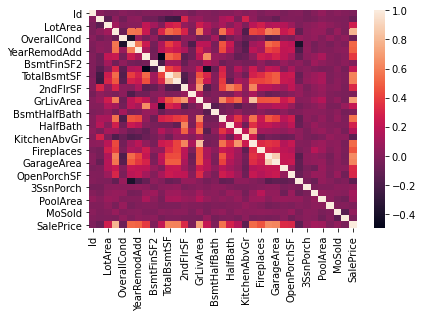

In [34]:
print("・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。")
print("\n")
#corr_dfは欠損値を行列共に削除したDFを使い、相関係数行列にしたもの
corr_df = del_missing_columns_deleteindex.corr() #del_missing_columns_deleteindexを.corr()メソッドで相関係数行列にする。


print(corr_df, "\n")#欠損値を削除したDFの特徴量同士の相関係数行列を表示する

sns.heatmap(corr_df) #相関係数行列のヒートマップを作る
# plt.xlabel("feature values")
# plt.ylabel("feature values")
# plt.title("heatmap")
# plt.pcolor(corr_df)
# plt.show()

#pandasのDataFrameからSalePriceと相関が高い上位11件を抽出するメソッド
display(corr_df.sort_values(by='SalePrice', ascending=False).head(11))
print("\n")

print("相関係数の高い特徴量は OverallQual. GrLivArea. GarageCars. GarageArea. TotalBsmtSF. 1stFlrSF. FullBath. TotRmsAbvGrd. YearBuilt. YearRemodAddでした。")


・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。


The correlation DataFrame is:
              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.593021    0.600991    0.561980     0.537523   
GrLivArea        0.593021   1.000000    0.467321    0.468971     0.455001   
GarageCars       0.600991   0.467321    1.000000    0.882613     0.435279   
GarageArea       0.561980   0.468971    0.882613    1.000000     0.486719   
TotalBsmtSF      0.537523   0.455001    0.435279    0.486719     1.000000   
1stFlrSF         0.475933   0.566084    0.439726    0.489741     0.819393   
FullBath         0.551267   0.630283    0.469619    0.405944     0.324886   
TotRmsAbvGrd     0.427720   0.825576    0.362248    0.337915     0.286125   
YearBuilt        0.573334   0.199286    0.537866    0.479460     0.393159   
YearRemodAdd     0.551605   0.287677    0.420573    0.372012     0.292546   

              1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
O

<AxesSubplot:>

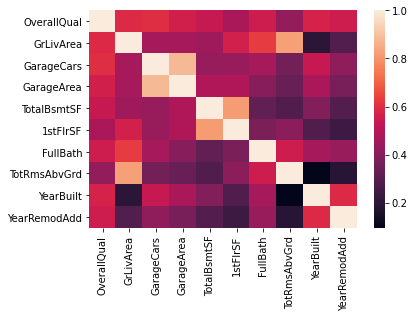

In [24]:
print("・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。")
print("\n")

#OverallQual. GrLivArea. GarageCars. GarageArea. TotalBsmtSF. 1stFlrSF. FullBath. TotRmsAbvGrd. YearBuilt. YearRemodAdd#上の設問で得た特徴量１０個のDFを作る
c = del_missing_columns_deleteindex.loc[:,["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]]

corr_df_2 = c.corr()
print("The correlation DataFrame is:")
print(corr_df_2, "\n")

sns.heatmap(corr_df_2) #ヒートマップを作る




In [19]:
print("・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。")
print("\n")
print("OverallQual：総合素材と仕上がりの品質")
print("GrLivArea：地上（地上）のリビングエリアの平方フィート")
print("GarageCars：車の容量でのガレージのサイズ")
print("GarageArea：ガレージのサイズ（平方フィート）")
print("TotalBsmtSF：地下室の総平方フィート")
print("1stFlrSF：1階平方フィート")
print("FullBath：グレード以上のフルバスルーム")
print("TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）")
print("YearBuilt：元の建設日")
print("YearRemodAdd：改造日")




・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。


OverallQual：総合素材と仕上がりの品質
GrLivArea：地上（地上）のリビングエリアの平方フィート
GarageCars：車の容量でのガレージのサイズ
GarageArea：ガレージのサイズ（平方フィート）
TotalBsmtSF：地下室の総平方フィート
1stFlrSF：1階平方フィート
FullBath：グレード以上のフルバスルーム
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）
YearBuilt：元の建設日
YearRemodAdd：改造日


In [20]:
print("・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。")
print("\n")
d = corr_df_2.sort_values(by='YearRemodAdd', ascending=False).head(4)

print("下の表から、相関係数が高い組み合わせ３つは、YearBuilt　OverallQual　FullBathでした。")
print("\n")
display(d)

・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


下の表から、相関係数が高い組み合わせ３つは、YearBuilt　OverallQual　FullBathでした。




,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
YearRemodAdd,0.551605,0.287677,0.420573,0.372012,0.292546,0.241344,0.438733,0.191603,0.592512,1.000000
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
